<a href="https://colab.research.google.com/github/ToaiDinh/ANN_AI/blob/main/CNN_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Link drive: https://drive.google.com/drive/folders/1PuASQP88tpH9MfQjjZUOBLzZJm7Hk0zO?usp=sharing

In [1]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'drive/MyDrive/data_training/emotion/train'+str(0)+'.jpg'
img = load_img(filepath,target_size=(150,150),grayscale=True)
img = img_to_array(img)
x = np.array([img])
for i in range(1,80):
  filepath = 'drive/MyDrive/data_training/emotion/train'+str(i)+'.jpg'
  img = load_img(filepath,target_size=(150,150),grayscale=True)
  img = img_to_array(img)
  img = img.astype('float32')
  x = np.concatenate((x,[img]),axis=0)
arr_0 = np.zeros((20,1),np.uint8)
arr_1 = np.ones((20,1),np.uint8)
y = np.concatenate((arr_0,arr_1),axis=0)
arr = np.ones((20,1),np.uint8)
for i in range(2,4):
  for j in range(0,20):
    arr[j,0] = i
  y = np.concatenate((y,arr),axis=0)
x_train = x
y_train = y
print(x.shape)
print(y.shape)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(80, 150, 150, 1)
(80, 1)


In [2]:
print(np.max(x))
print(np.min(x))
print(np.max(y))
print(np.min(y))

255.0
0.0
3
0


In [3]:
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train,4)
print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("Max x train ",np.max(x_train))
print("Min x train ",np.min(x_train))

x train shape:  (80, 150, 150, 1)
y train shape:  (80, 4)
Max x train  1.0
Min x train  0.0


In [7]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 256)     2560      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 256)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1440000)           0         
                                                                 
 dense_5 (Dense)             (None, 64)                92160064  
                                                                 
 dense_6 (Dense)             (None, 4)                 260       
                                                                 
Total params: 92,162,884
Trainable params: 92,162,884
Non-trainable params: 0
__________________________________________

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


20/20 [==============================] - 22s 1s/step - loss: 258.7401 - accuracy: 0.2750
Epoch 2/10
20/20 [==============================] - 21s 1s/step - loss: 117.5156 - accuracy: 0.3000
Epoch 3/10
20/20 [==============================] - 22s 1s/step - loss: 61.1558 - accuracy: 0.5250
Epoch 4/10
20/20 [==============================] - 24s 1s/step - loss: 78.2475 - accuracy: 0.4125
Epoch 5/10
20/20 [==============================] - 22s 1s/step - loss: 24.9091 - accuracy: 0.6000
Epoch 6/10
20/20 [==============================] - 21s 1s/step - loss: 40.9636 - accuracy: 0.4500
Epoch 7/10
20/20 [==============================] - 22s 1s/step - loss: 17.0635 - accuracy: 0.6500
Epoch 8/10
20/20 [==============================] - 21s 1s/step - loss: 8.7588 - accuracy: 0.7125
Epoch 9/10
20/20 [==============================] - 21s 1s/step - loss: 9.0938 - accuracy: 0.7625
Epoch 10/10
20/20 [==============================] - 21s 1s/step - loss: 7.4583 - accuracy: 0.9125


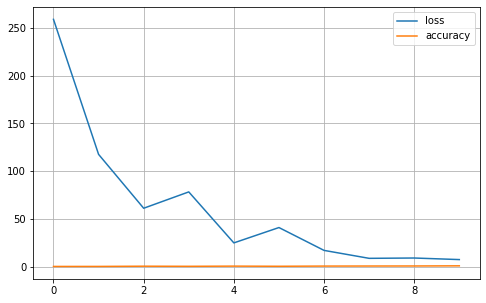

KeyError: ignored

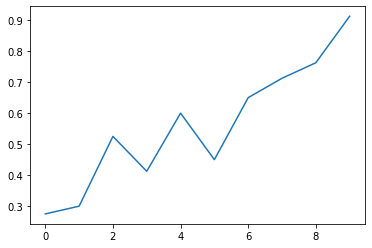

In [9]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=4,verbose=1)
model_json = model.to_json()
with open('drive/MyDrive/Model/Emotion/emotion_recognition_config.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/Model/Emotion/emotion_recognition_weights.h5')
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

In [11]:
label = ['Hanh phuc','Buon','Tuc gian','So hai']

In [12]:
from google.colab import files
upload1 = files.upload()
upload2 = files.upload()
upload3 = files.upload()
upload4 = files.upload()

Saving test0.jpg to test0.jpg


Saving test1.jpg to test1.jpg


Saving test2.jpg to test2.jpg


Saving test3.jpg to test3.jpg


In [22]:
from google.colab import files
upload1 = files.upload()

Saving test6.jpg to test6.jpg


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Tuc gian


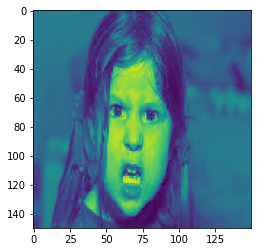

In [21]:
url = 'test2.jpg'
test1 = load_img(url,target_size=(150,150),grayscale=True)
plt.imshow(test1)
test1 = img_to_array(test1)
test1 = test1.astype('float32')
test1 = test1.reshape(1,150,150,1)
test1 = test1/255.0
print(label[int(np.argmax(model.predict(test1)))])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Tuc gian


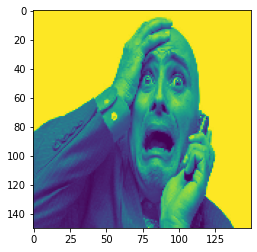

In [23]:
url = 'test6.jpg'
test1 = load_img(url,target_size=(150,150),grayscale=True)
plt.imshow(test1)
test1 = img_to_array(test1)
test1 = test1.astype('float32')
test1 = test1.reshape(1,150,150,1)
test1 = test1/255.0
print(label[int(np.argmax(model.predict(test1)))])